In [43]:
# Packages

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

import random
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Seed
seed = 256
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [45]:
# Variables
input_size = 28 * 28
hid_1 = 28 * 4
output_size = 10
Epochs = 15
batch_size = 64
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
# Normalize data with mean = 0.5, std = 1.0
Transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0))
])

In [11]:
# Download Mnist dataset
path = './dataset'
train_data = MNIST(path, transform=Transforms, train=True, download=True)
test_data = MNIST(path, transform=Transforms, train=False, download=True)

Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw




Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw
Processing...
Done!


60000
10000
10000
torch.Size([28, 28])
5


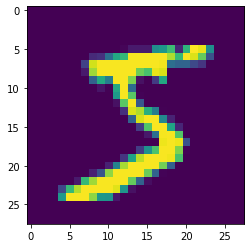

In [33]:
# Check the MNIST data
print(len(train_data))
print(len(test_data))

temp_data = train_data.data[0]
temp_label = train_data.targets[0].item()

plt.imshow(temp_data.numpy())
print(temp_data.shape)
print(temp_label)

In [34]:
# Batch
train_iterator = DataLoader(dataset = train_data,
                            batch_size = batch_size,
                            shuffle = True,
                            drop_last = True)

In [42]:
# Model
linear1 = nn.Linear(input_size, hid_1, bias = True)
linear2 = nn.Linear(hid_1, output_size, bias = True)

model = nn.Sequential(linear1, nn.ReLU(), linear2).to(device)

In [44]:
# Criterion, optimizer
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters())

In [46]:
# Train model

for epoch in range(Epochs):
    
    avg_cost = 0
    total_batch = len(train_iterator)
    model.train()
    
    for X, y in train_iterator:
        X = X.view(-1, input_size).to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        
        avg_cost += loss / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.439732164
Epoch: 0002 cost = 0.238480031
Epoch: 0003 cost = 0.172742635
Epoch: 0004 cost = 0.136799514
Epoch: 0005 cost = 0.113878042
Epoch: 0006 cost = 0.100105740
Epoch: 0007 cost = 0.086349025
Epoch: 0008 cost = 0.078291170
Epoch: 0009 cost = 0.071172722
Epoch: 0010 cost = 0.066217229
Epoch: 0011 cost = 0.060329273
Epoch: 0012 cost = 0.055009604
Epoch: 0013 cost = 0.052673806
Epoch: 0014 cost = 0.049155239
Epoch: 0015 cost = 0.043865431


Test Accuracy: 0.902099967
Label:  3
Prediction:  3
Single output:
tensor([[-1198.1171, -1969.3837, -1679.5087,  2891.7388, -4509.0635,   369.8907,
         -6435.2344, -2651.6714, -3040.2004,  -973.6569]], device='cuda:0')


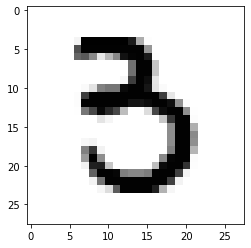

In [67]:
# Test

model.eval()
with torch.no_grad():
    X = test_data.test_data.view(-1, input_size).float().to(device)
    y = test_data.test_labels.to(device)
    
    output = model(X)
    correct = torch.argmax(output, 1) == y
    acc = correct.float().mean().item()
    print("Test Accuracy: {:.9f}".format(acc))
    
    # plot ref: https://m.blog.naver.com/PostView.nhn?blogId=hongjg3229&logNo=221560700128&proxyReferer=https:%2F%2Fwww.google.com%2F
    # Get one and predict
    r = random.randint(0, len(test_data) - 1)
    X_single_data = test_data.test_data[r].view(-1, input_size).float().to(device)
    Y_single_data = test_data.test_labels[r].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    # check single output
    print("Single output:")
    print(single_prediction)

    plt.imshow(test_data.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()